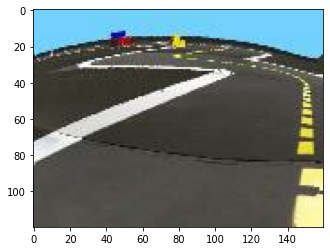

In [11]:
import cv2
import numpy as np
image_num="000072"
img = cv2.imread(f"logs/segmentation_results/{image_num}_image.png").astype(np.float32)
cv2_plt_imshow(img.astype(np.uint8))

In [12]:
import onnxruntime as ort
sess_ort = ort.InferenceSession("./output/segmentation.onnx")
import time
start = time.time()
qty = 10
for i in range(0,10):
    res = sess_ort.run(output_names=["output:0"], input_feed={"input_rgb:0": img.reshape((1,120,160,3))})
end = time.time()
delta=end-start
seg = res[0]
print(f"Average frame rate: {1/(delta/qty)}")


Average frame rate: 31.937475919182873


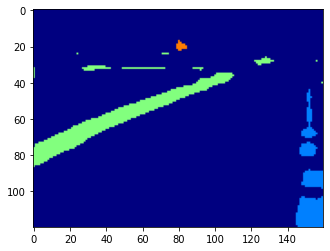

In [13]:
from cv2_plt_imshow import cv2_plt_imshow
seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*64, cv2.COLORMAP_JET))